<a href="https://colab.research.google.com/github/bwubbu/Neural-Network-Wine-Classifier/blob/main/WineClassificationNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <div align="center">**MACHINE LEARNING** </div>

### <div align="center">**Classifying Wine type using Neural Network Architecture** </div>

<div align="center"> Name: Rudzaidan Bin Rosli @ Rosdi </div>

<div align="center"> Matric no.: U2002236 </div>

<div align="center">Wine Quality dataset was generated by Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos, and Jose Reis (CVRVV) in 2009 and is openly accessible for research via the University of California, Irvine Machine Learning repository. Two datasets of red and white wine samples are available in this repository. The inputs include objective testing (such as PH values), while the output is based on sensory data (the median of at least three expert wine ratings). Each expert assigned a score to the wine quality, ranging from 0 (very bad) to 10 (very excellent).</div>


# ***DATA PREPARATION***

In [ ]:
# importing pandas
import pandas as pnd

# importing numpy
import numpy as nmp

# importing GridSearch
from sklearn.model_selection import GridSearchCV

# importing KerasClassifier
from keras.wrappers.scikit_learn import KerasClassifier

from tabulate import tabulate

# importing sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# importing Bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.palettes import d3
from bokeh.io import output_notebook
from bokeh.models import Legend
output_notebook()

# importing pyplot
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline

# importing seaborn
import seaborn as sea

# importing Missing Map
import missingno as msno

# importing tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

!pip install ann_visualizer
from ann_visualizer.visualize import ann_viz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


The csv data file is separated by ";" so we will use sep = ";" to load the data.

In [ ]:
# reads white wine data
white_wine = pnd.read_csv("winequality-white.csv", sep=';')

# reads red wine data
red_wine = pnd.read_csv("winequality-red.csv",sep=';')

Let see whether we have the data or not by viewing the top 5 samples in the red and white dataset.

In [ ]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


As a result, we can see that our data has been loaded. How many samples and variables does our dataset contain, though?

In [ ]:
print("The Red wine dataset has", red_wine.shape[0], "number of observations and", 
      red_wine.shape[1], "variables")
print("The White wine dataset has", white_wine.shape[0], "number of observations and",
      white_wine.shape[1], "variables")

The Red wine dataset has 1599 number of observations and 12 variables
The White wine dataset has 4898 number of observations and 12 variables


As we can see from the data dimensions, both datasets have the same number of variables, however the white wine dataset has almost three times as many observations as the red wine dataset. Following characteristics (columns) apply to each wine sample (row):

*   Fixed acidity
*   Volatile acidity
*   Citric acid
*   Residual sugar
*   Chlorides
*   Free sulfur dioxide
*   Total sulfur dioxide
*   Density
*   pH
*   Sulphates
*   Alcohol
*   Quality (score between 0 and 10)

## ***Missing Values***

In [ ]:
# plotting the missing map
def missing_map(data, color, title = "Missing map"):
    # missing map from missingno
    plot = msno.matrix(data, color=color)
    # adding the title
    plot.set_title(title, fontsize = 40, weight = "bold")
    # making the plot
    plt.show()

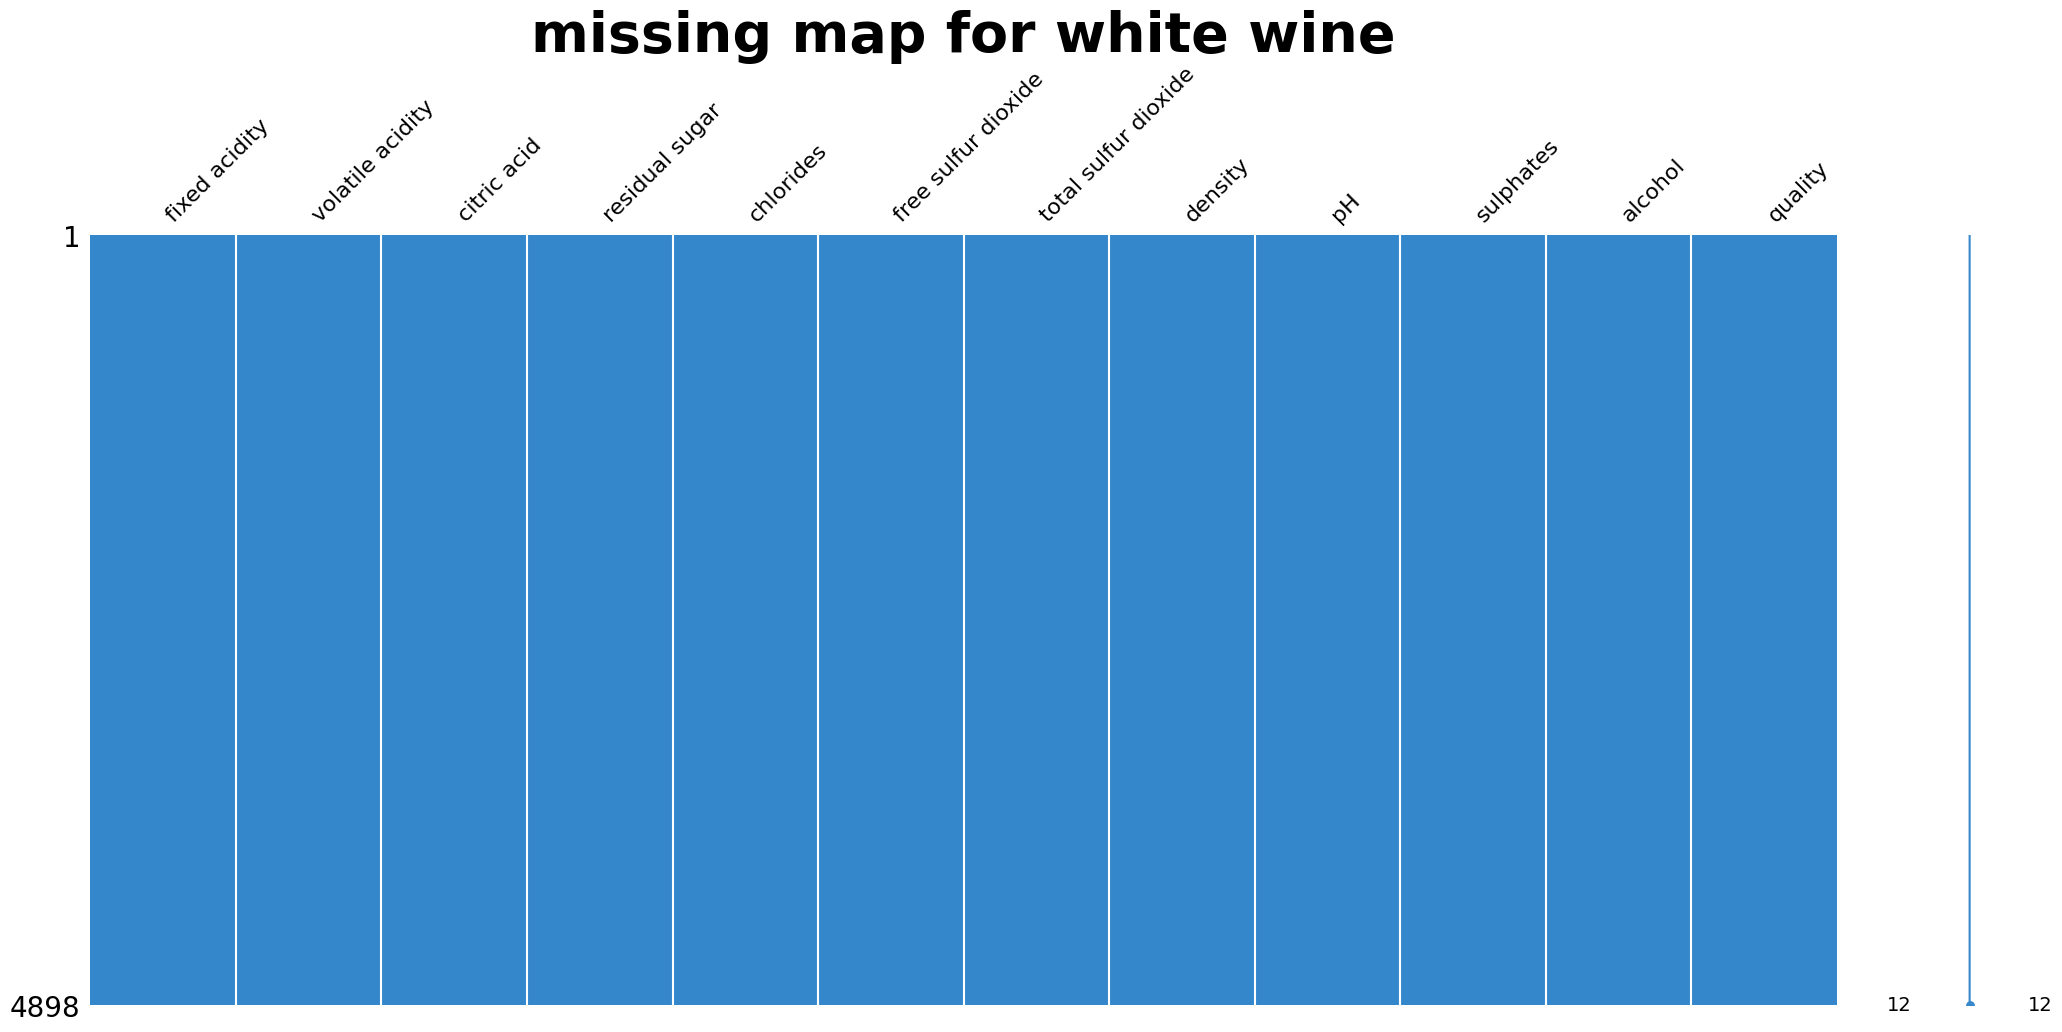

In [ ]:
missing_map(white_wine, (0.21,  0.53, 0.8), "missing map for white wine")

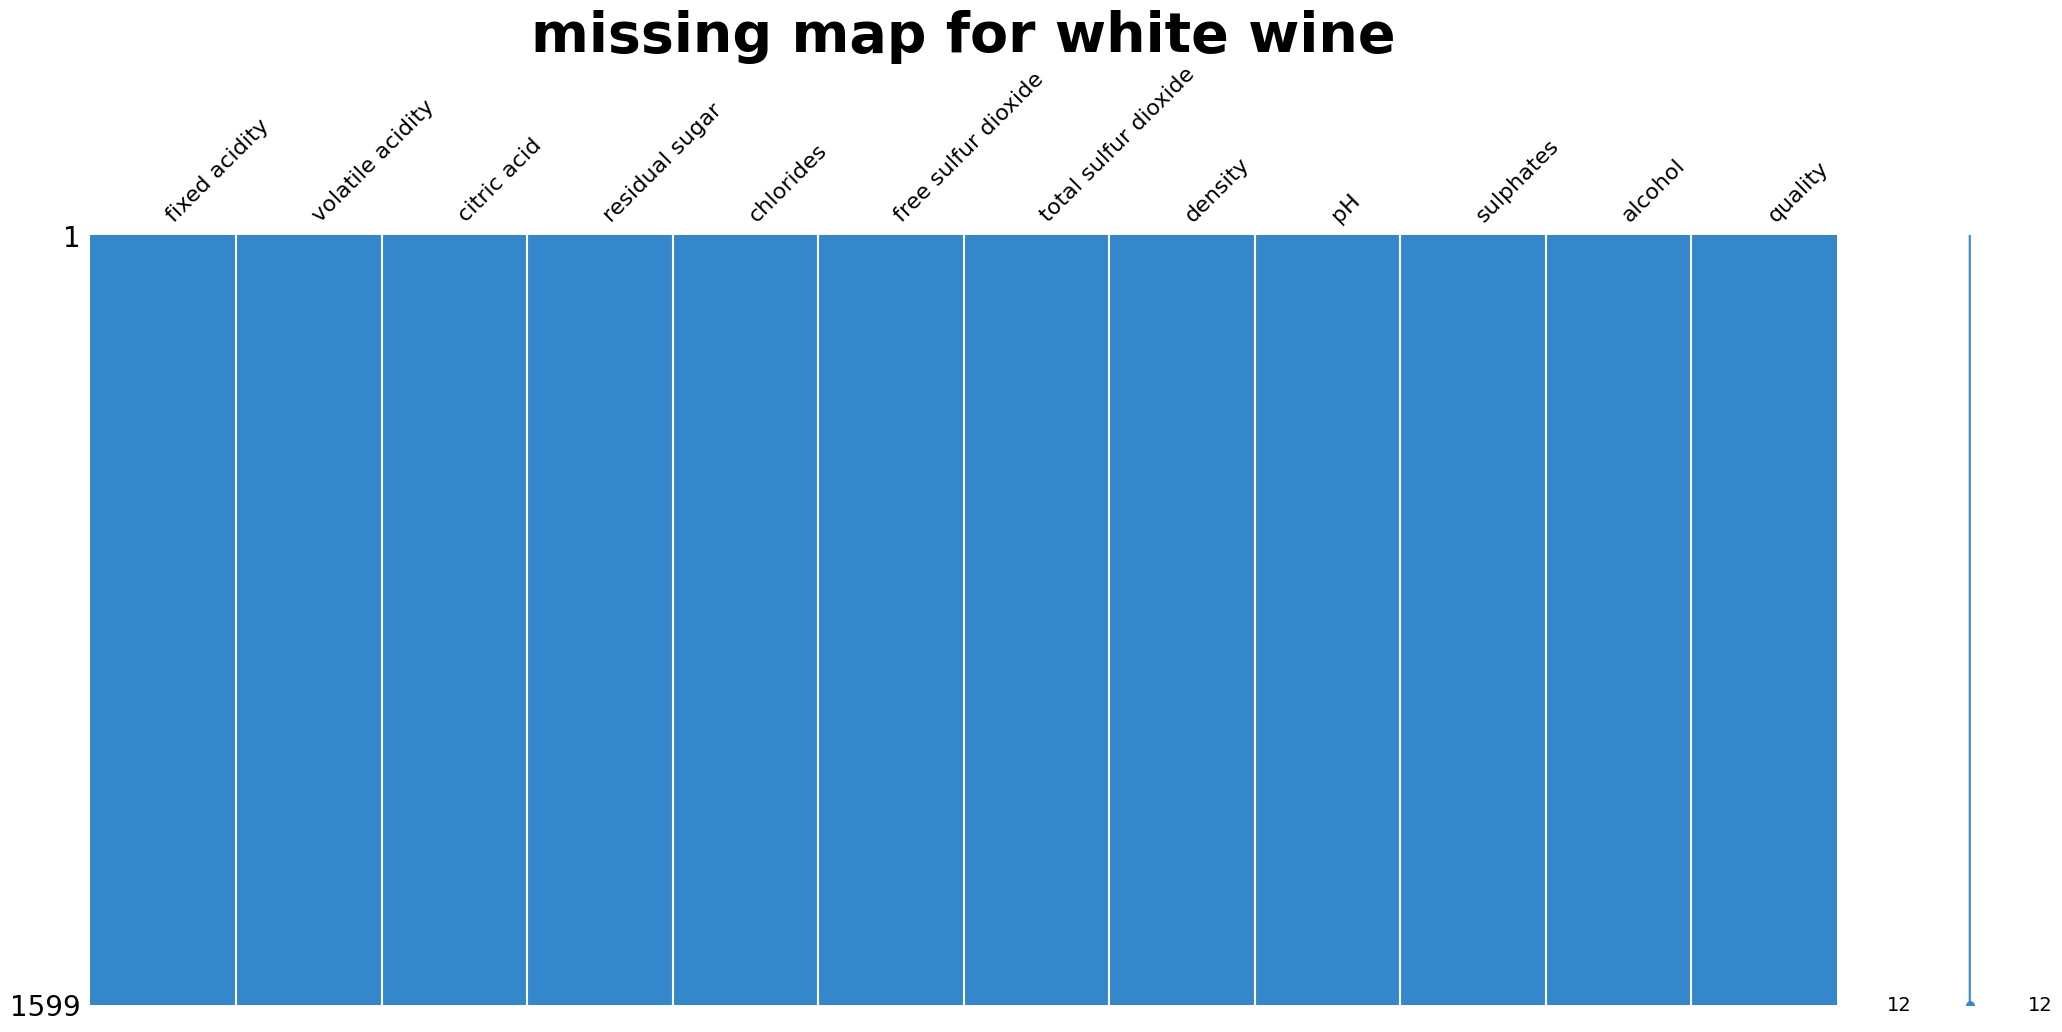

In [ ]:
missing_map(red_wine, (0.21,  0.53, 0.8), "missing map for white wine")

By using a missing map, we can sort of see that the dataset has no missing data. We will perform a quick sanity check on the dataset to make sure there aren't any missing values.

In [ ]:
# computing the percentage of missing value in the data
def missing_percentage(data1, data2, col_name = "Missing value (%)"):
    # calculating the missing percentage
    missing_df1 = pnd.DataFrame(data1.isnull().sum() /len(data1)*100, columns = [col_name])
    missing_df2 = pnd.DataFrame(data2.isnull().sum() /len(data2)*100, columns = [col_name])
    # forming the output dataframe
    missing_df = pnd.DataFrame({'Red Wine': missing_df1.iloc[:, 0], 'White wine': missing_df2.iloc[:, 0]})
    return missing_df

missing_percentage(red_wine, white_wine)

,Red Wine,White wine
fixed acidity,0.0,0.0
volatile acidity,0.0,0.0
citric acid,0.0,0.0
residual sugar,0.0,0.0
chlorides,0.0,0.0
free sulfur dioxide,0.0,0.0
total sulfur dioxide,0.0,0.0
density,0.0,0.0
pH,0.0,0.0
sulphates,0.0,0.0


## ***Correlation***

In [ ]:
def confusion_matrix_plot(data, title = "Red Wine Correlation Matrix", height = 9, width = 12):
    # Get the confusion matrix
    conf_mat = round(data.corr(method ="spearman"), 2)
    # Create the heatmap
    plt.figure(figsize = (width, height))
    ax = sea.heatmap(conf_mat, annot=True, annot_kws={"size": 15}, cmap = sea.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)
    # Customize the style of the heatmap
    # Set the title, it's font size and position
    ax.axes.set_title(title, fontsize = 30)
    ax.title.set_position([.5, 1.03])
    ax.set_xticklabels(labels = conf_mat.index, fontsize = 18)
    ax.set_yticklabels(labels = conf_mat.index, fontsize = 18)
    # Show the plot
    plt.show()

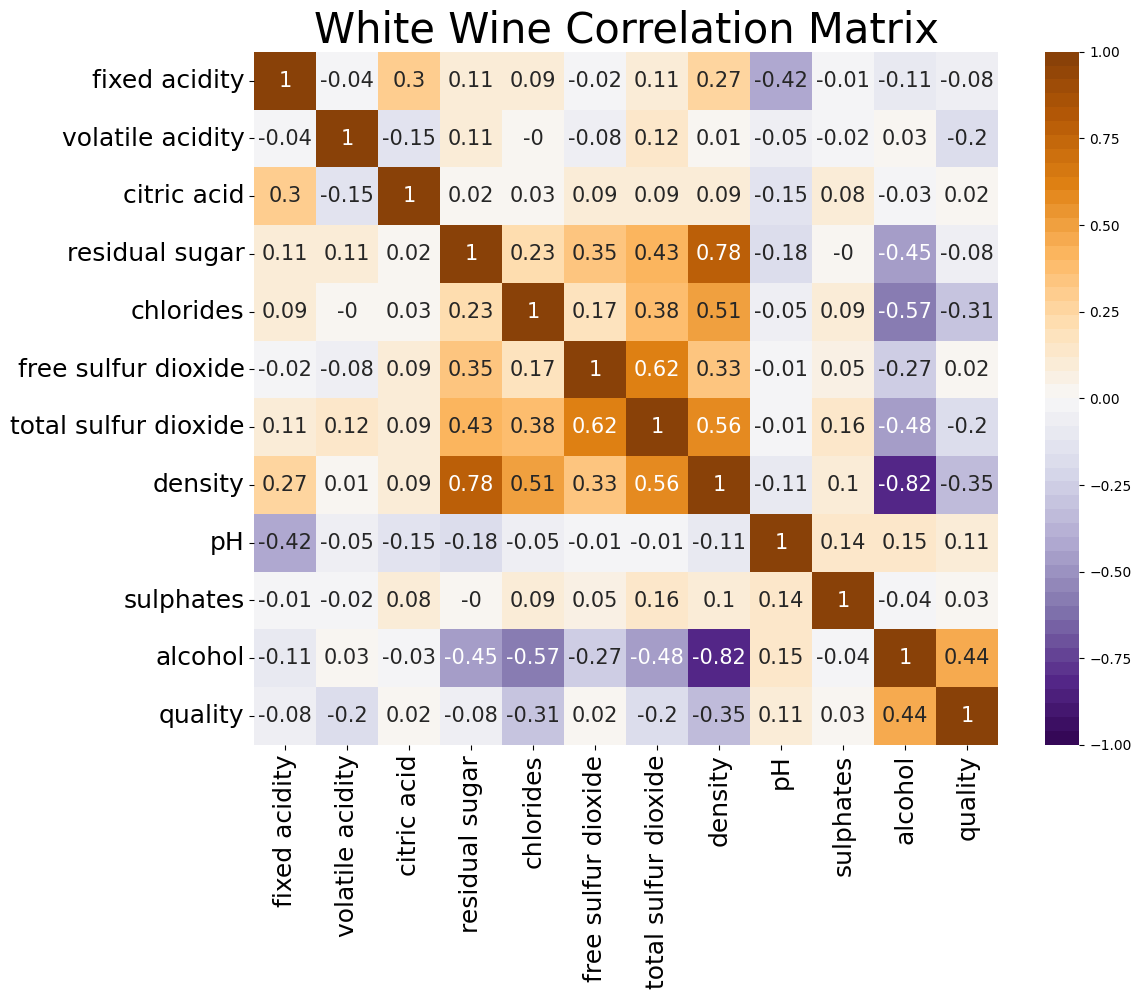

In [ ]:
confusion_matrix_plot(white_wine, title = "White Wine Correlation Matrix")

Here are some conclusions drawn from the white wine heatmap:

* We see that low density contents typically include a lot of alcohol.
* Wine's sugar level may be a good indicator of its density.
* Similar to how total and free sulphur dioxide are connected in red wine.

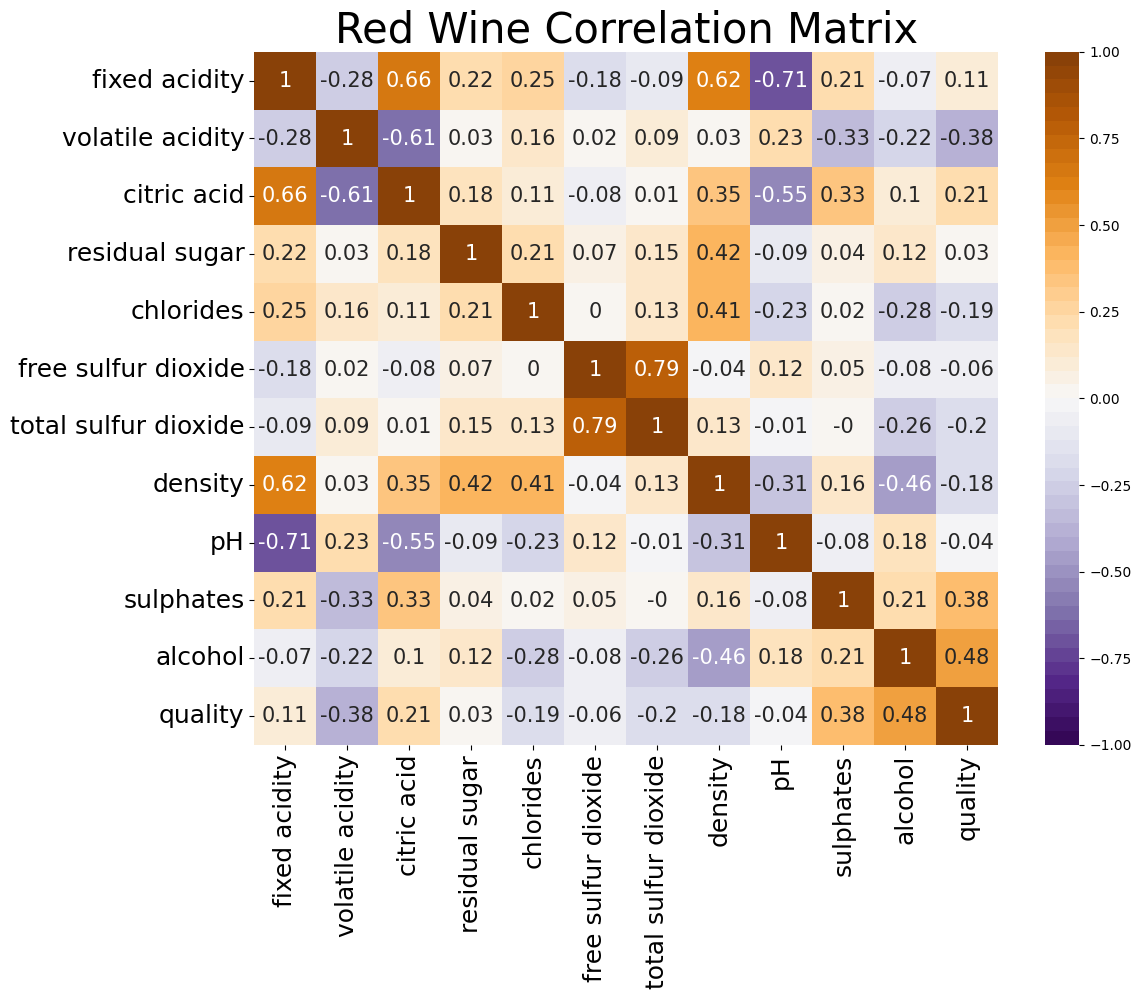

In [ ]:
confusion_matrix_plot(red_wine, title = "Red Wine Correlation Matrix")

The dataset's variables' correlation is displayed on a heatmap. good correlation and great concentration of colour representation. Purple denotes a negative correlation, whereas brown denotes a positive association.

We can conclude the following from the red wine heatmap shown above:

* It appears that there are inverse correlations between fixed acidity and pH.The same is true for both volatile acidity and citric acid.

* Total sulphur dioxide and free sulphur dioxide are strongly positively correlated.

## ***Dataset Splitting***

In [ ]:
# Add `type` column to `red` with value 1
red_wine['type'] = 1

# Add `type` column to `white` with value 0
white_wine['type'] = 0

# Append `white` to `red`
wine_data = red_wine.append(white_wine, ignore_index=True)
wine_data.tail()

<ipython-input-80-0b28f00fd17e>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wine_data = red_wine.append(white_wine, ignore_index=True)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


In [ ]:
# Split the data into features (X) and target (y)
X = wine_data.drop('quality', axis=1)  # Exclude the target variable 'quality'
y = wine_data['quality']

# Specify the data 
X=wine_data.iloc[:,0:11]

# Specify the target labels and flatten the array
y= nmp.ravel(wine_data.type)
#y= wines.type

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=42)

# Print the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (3182, 11)
Validation set shape: (1365, 11)
Testing set shape: (1950, 11)


# ***Model Development***



## 1st Architecture

- Two hidden layers
- Small node size (4)

In [ ]:
# define the model architecture

# Initialize the constructor
model1 = Sequential()

# Add an input layer 
model1.add(Dense(12, activation='sigmoid', input_shape=(11,)))

# Add one hidden layer 
model1.add(Dense(4, activation='sigmoid'))

# Add one hidden layer 
model1.add(Dense(4, activation='sigmoid'))

# Add an output layer 
model1.add(Dense(1, activation='sigmoid'))

# Generate the model architecture visualization
ann_viz(model1, title="Model Architecture 1", filename="model_architecture_1.png")

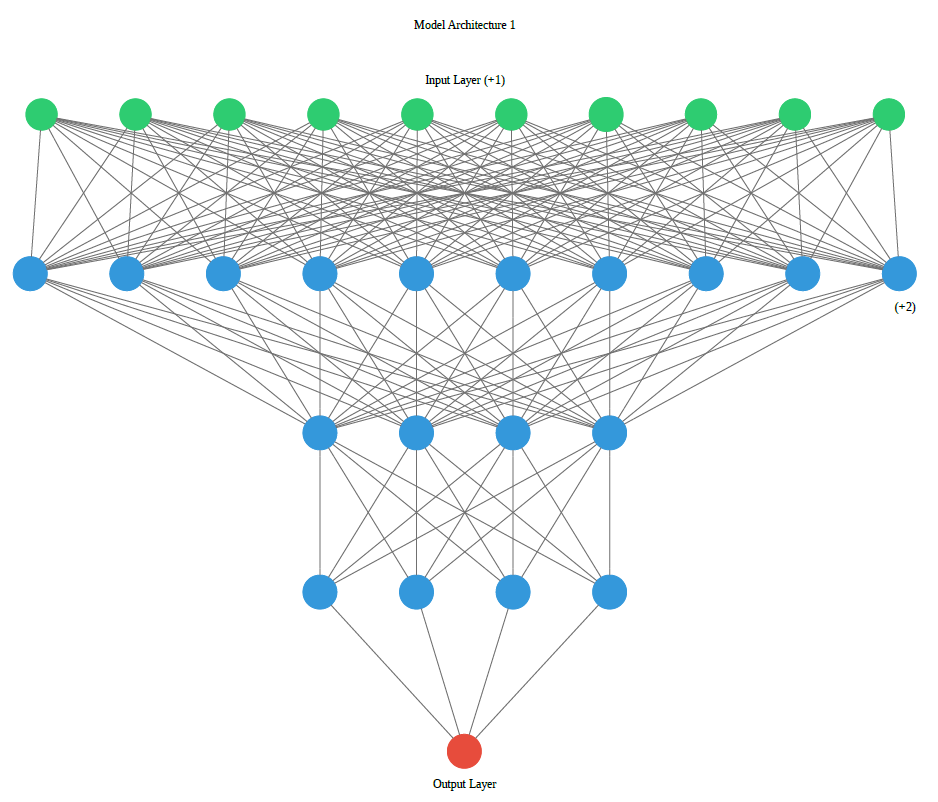

In [ ]:
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model1.fit(X_train, y_train,epochs=100, batch_size=32, verbose=1, validation_data=(X_val, y_val))

Epoch 1/100
100/100 [==============================] - 3s 9ms/step - loss: 0.6608 - accuracy: 0.6490 - val_loss: 0.6088 - val_accuracy: 0.7538
Epoch 2/100
100/100 [==============================] - 1s 5ms/step - loss: 0.5663 - accuracy: 0.7608 - val_loss: 0.5311 - val_accuracy: 0.7538
Epoch 3/100
100/100 [==============================] - 0s 4ms/step - loss: 0.4984 - accuracy: 0.7608 - val_loss: 0.4768 - val_accuracy: 0.7538
Epoch 4/100
100/100 [==============================] - 0s 3ms/step - loss: 0.4479 - accuracy: 0.7608 - val_loss: 0.4323 - val_accuracy: 0.7538
Epoch 5/100
100/100 [==============================] - 0s 3ms/step - loss: 0.4064 - accuracy: 0.7608 - val_loss: 0.3974 - val_accuracy: 0.7538
Epoch 6/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3722 - accuracy: 0.7608 - val_loss: 0.3658 - val_accuracy: 0.7538
Epoch 7/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3419 - accuracy: 0.9148 - val_loss: 0.3412 - val_accuracy: 0.9348

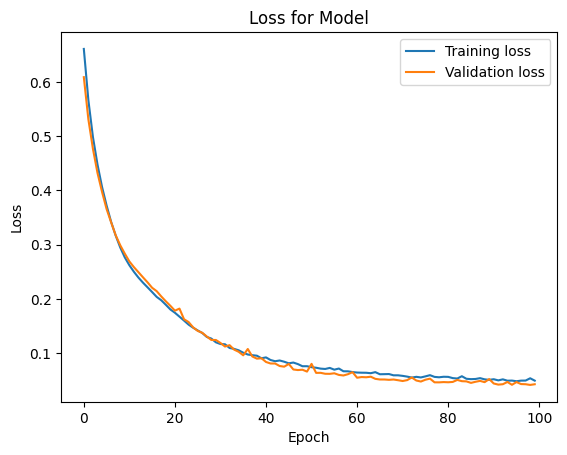

In [ ]:
# Plot the MAE for model
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.title('Loss for Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

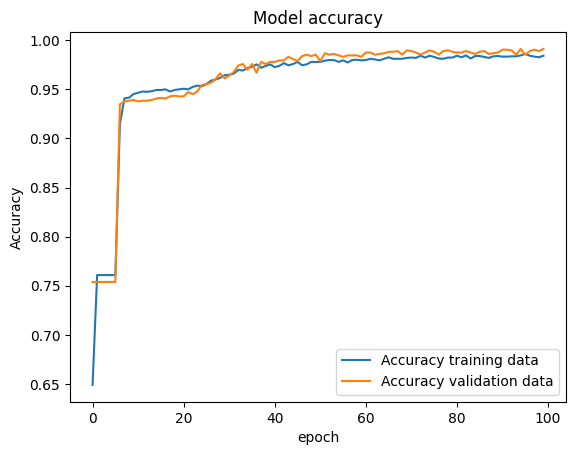

In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy training data')
plt.plot(history.history['val_accuracy'], label='Accuracy validation data')
plt.legend()
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
y_pred1 = nmp.round(model1.predict(X_test))

61/61 [==============================] - 0s 2ms/step


In [ ]:
y_pred1[0:10]

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [ ]:
loss1, acc1 = model1.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc1)

y_pred_train = model1.predict(X_train)
print('Train Accuracy: %.3f' % train_accuracy)

Test Accuracy: 0.979
100/100 [==============================] - 0s 2ms/step
Train Accuracy: 0.985


In [ ]:
print(pnd.DataFrame(metrics.confusion_matrix(y_test, y_pred1, labels=[0 ,1]), index=['true:White', 'true:Red'], columns=['pred:White', 'pred:Red']))

            pred:White  pred:Red
true:White        1425        23
true:Red            18       484


Now, we can move on to other types of architectures to find any difference between them.

## 2nd Architecture

- Two hidden layers
- Medium-sized node (8)

In [ ]:
# define the model architecture

# Initialize the constructor
model2 = Sequential()

# Add an input layer 
model2.add(Dense(12, activation='sigmoid', input_shape=(11,)))

# Add one hidden layer 
model2.add(Dense(8, activation='sigmoid'))

# Add one hidden layer 
model2.add(Dense(8, activation='sigmoid'))

# Add an output layer 
model2.add(Dense(1, activation='sigmoid'))

# Visualize the model architecture
ann_viz(model2, title="Model Architecture 2")

# Generate the model architecture visualization
ann_viz(model2, title="Model Architecture 2", filename="model_architecture_2.png")

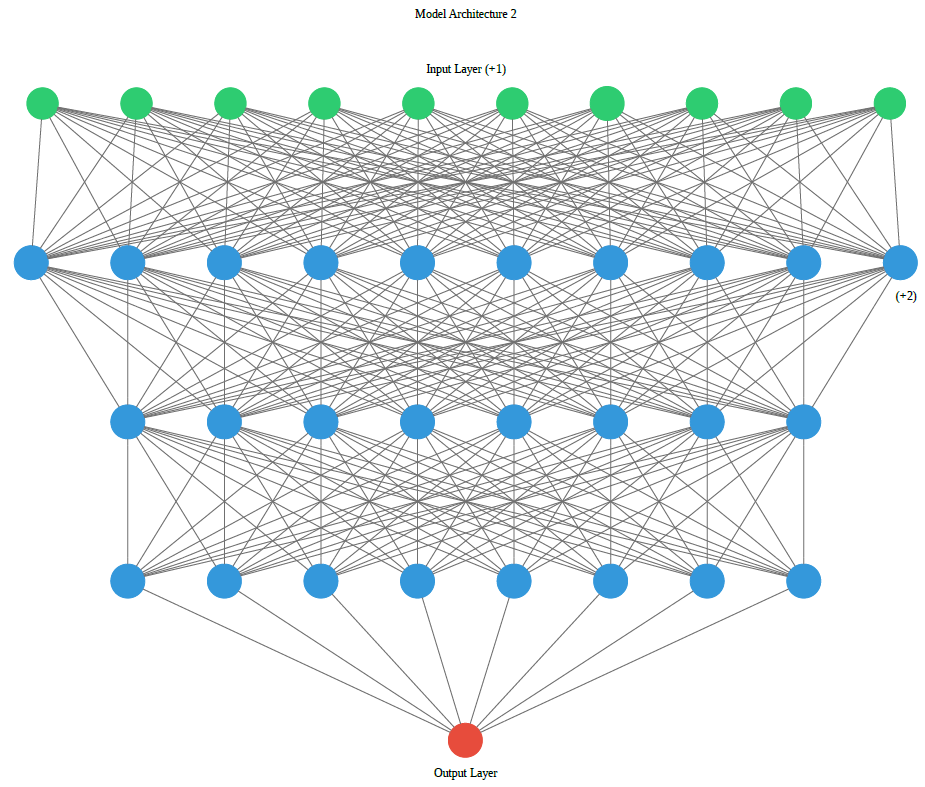

In [ ]:
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
history = model2.fit(X_train, y_train,epochs=100, batch_size=32, verbose=1, validation_data=(X_val, y_val))

Epoch 1/100
100/100 [==============================] - 2s 7ms/step - loss: 0.7182 - accuracy: 0.4714 - val_loss: 0.6131 - val_accuracy: 0.7538
Epoch 2/100
100/100 [==============================] - 1s 7ms/step - loss: 0.5640 - accuracy: 0.7608 - val_loss: 0.5354 - val_accuracy: 0.7538
Epoch 3/100
100/100 [==============================] - 1s 6ms/step - loss: 0.5084 - accuracy: 0.7608 - val_loss: 0.4905 - val_accuracy: 0.7538
Epoch 4/100
100/100 [==============================] - 1s 5ms/step - loss: 0.4606 - accuracy: 0.7608 - val_loss: 0.4439 - val_accuracy: 0.7538
Epoch 5/100
100/100 [==============================] - 1s 5ms/step - loss: 0.4118 - accuracy: 0.7608 - val_loss: 0.3934 - val_accuracy: 0.7538
Epoch 6/100
100/100 [==============================] - 0s 5ms/step - loss: 0.3601 - accuracy: 0.8595 - val_loss: 0.3437 - val_accuracy: 0.9341
Epoch 7/100
100/100 [==============================] - 1s 5ms/step - loss: 0.3125 - accuracy: 0.9371 - val_loss: 0.3015 - val_accuracy: 0.9341

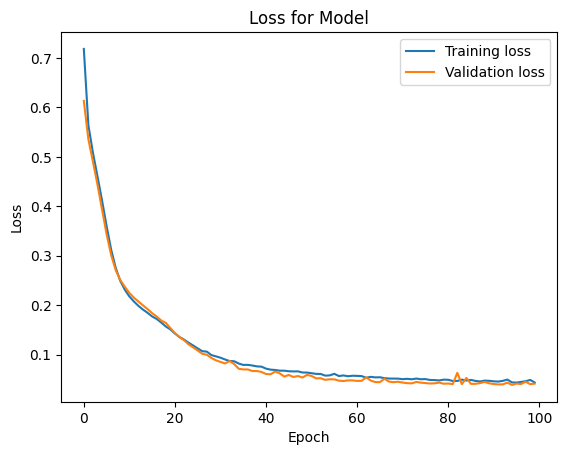

In [ ]:
# Plot the MAE for model
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.title('Loss for Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

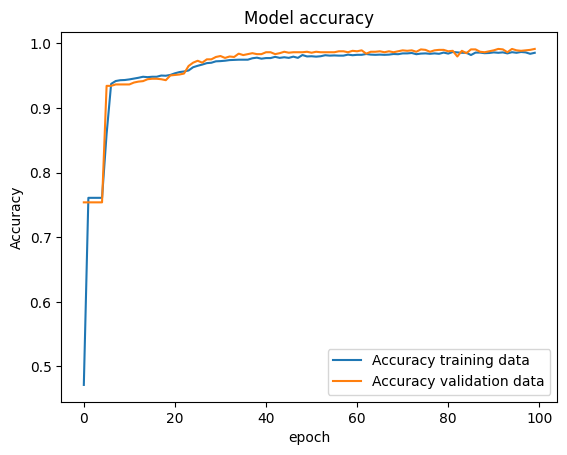

In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy training data')
plt.plot(history.history['val_accuracy'], label='Accuracy validation data')
plt.legend()
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
y_pred2 = nmp.round(model2.predict(X_test))

y_pred2[0:10]

loss2, acc2 = model2.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc2)


loss2, acc2 = model2.evaluate(X_train, y_train, verbose=0)
print('Train Accuracy: %.3f' % acc2)

print(pnd.DataFrame(metrics.confusion_matrix(y_test, y_pred2, labels=[0 ,1]), index=['true:White', 'true:Red'], columns=['pred:White', 'pred:Red']))

61/61 [==============================] - 0s 1ms/step
Test Accuracy: 0.979
Train Accuracy: 0.987
            pred:White  pred:Red
true:White        1423        25
true:Red            16       486


## 3rd Architecture

- Two hidden Layers
- Large-sized node (12)

In [ ]:
# define the model architecture

# Initialize the constructor
model3 = Sequential()

# Add an input layer 
model3.add(Dense(12, activation='sigmoid', input_shape=(11,)))

# Add one hidden layer 
model3.add(Dense(12, activation='sigmoid'))

# Add one hidden layer 
model3.add(Dense(12, activation='sigmoid'))

# Add an output layer 
model3.add(Dense(1, activation='sigmoid'))

# Visualize the model architecture
ann_viz(model3, title="Model Architecture 3")

# Generate the model architecture visualization
ann_viz(model3, title="Model Architecture 3", filename="model_architecture_3.png")

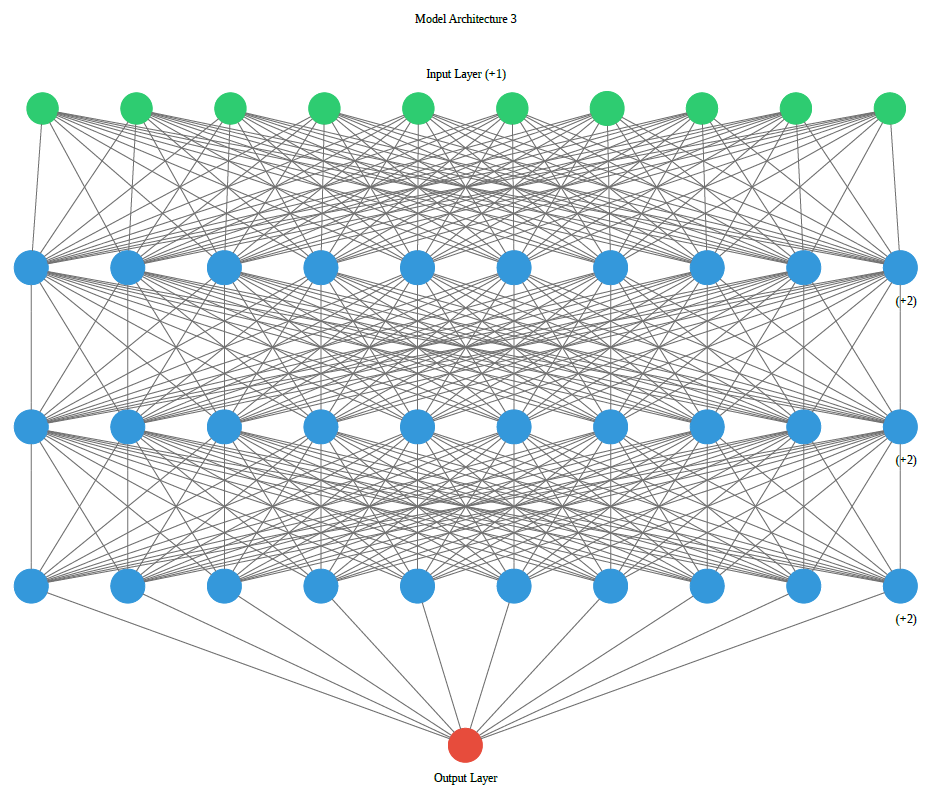

In [ ]:
model3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
history = model3.fit(X_train, y_train,epochs=100, batch_size=32, verbose=1, validation_data=(X_val, y_val))

Epoch 1/100
100/100 [==============================] - 2s 6ms/step - loss: 0.6024 - accuracy: 0.7231 - val_loss: 0.5493 - val_accuracy: 0.7538
Epoch 2/100
100/100 [==============================] - 0s 3ms/step - loss: 0.5218 - accuracy: 0.7608 - val_loss: 0.5033 - val_accuracy: 0.7538
Epoch 3/100
100/100 [==============================] - 0s 3ms/step - loss: 0.4629 - accuracy: 0.7608 - val_loss: 0.4354 - val_accuracy: 0.7538
Epoch 4/100
100/100 [==============================] - 0s 4ms/step - loss: 0.3880 - accuracy: 0.7684 - val_loss: 0.3573 - val_accuracy: 0.9150
Epoch 5/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3132 - accuracy: 0.9362 - val_loss: 0.2937 - val_accuracy: 0.9319
Epoch 6/100
100/100 [==============================] - 0s 3ms/step - loss: 0.2599 - accuracy: 0.9393 - val_loss: 0.2553 - val_accuracy: 0.9341
Epoch 7/100
100/100 [==============================] - 0s 3ms/step - loss: 0.2288 - accuracy: 0.9403 - val_loss: 0.2350 - val_accuracy: 0.9333

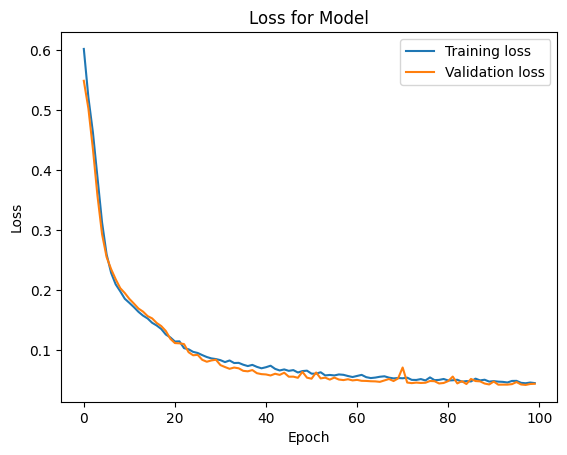

In [ ]:
# Plot the MAE for model
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.title('Loss for Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

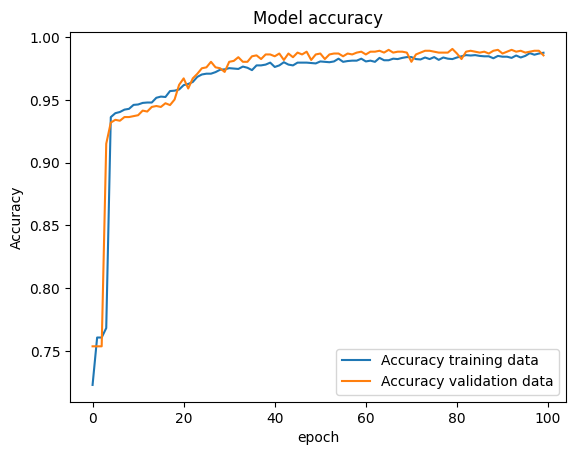

In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy training data')
plt.plot(history.history['val_accuracy'], label='Accuracy validation data')
plt.legend()
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
y_pred3 = nmp.round(model3.predict(X_test))

y_pred3[0:10]

loss3, acc3 = model3.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc3)


loss3, acc3 = model3.evaluate(X_train, y_train, verbose=0)
print('Train Accuracy: %.3f' % acc3)

print(pnd.DataFrame(metrics.confusion_matrix(y_test, y_pred3, labels=[0 ,1]), index=['true:White', 'true:Red'], columns=['pred:White', 'pred:Red']))

61/61 [==============================] - 0s 1ms/step
Test Accuracy: 0.978
Train Accuracy: 0.987
            pred:White  pred:Red
true:White        1436        12
true:Red            31       471


## 4th Architecture

- One hidden layer
- Medium-sized node (8)

In [ ]:
# Define the model architecture
model4 = Sequential()

# Add an input layer
model4.add(Dense(12, activation='sigmoid', input_shape=(11,)))

# Add the first hidden layer
model4.add(Dense(8, activation='sigmoid'))

# Add an output layer
model4.add(Dense(1, activation='sigmoid'))

# Visualize the model architecture
ann_viz(model4, title="Model Architecture 4")

# Generate the model architecture visualization
ann_viz(model4, title="Model Architecture 4", filename="model_architecture_4.png")

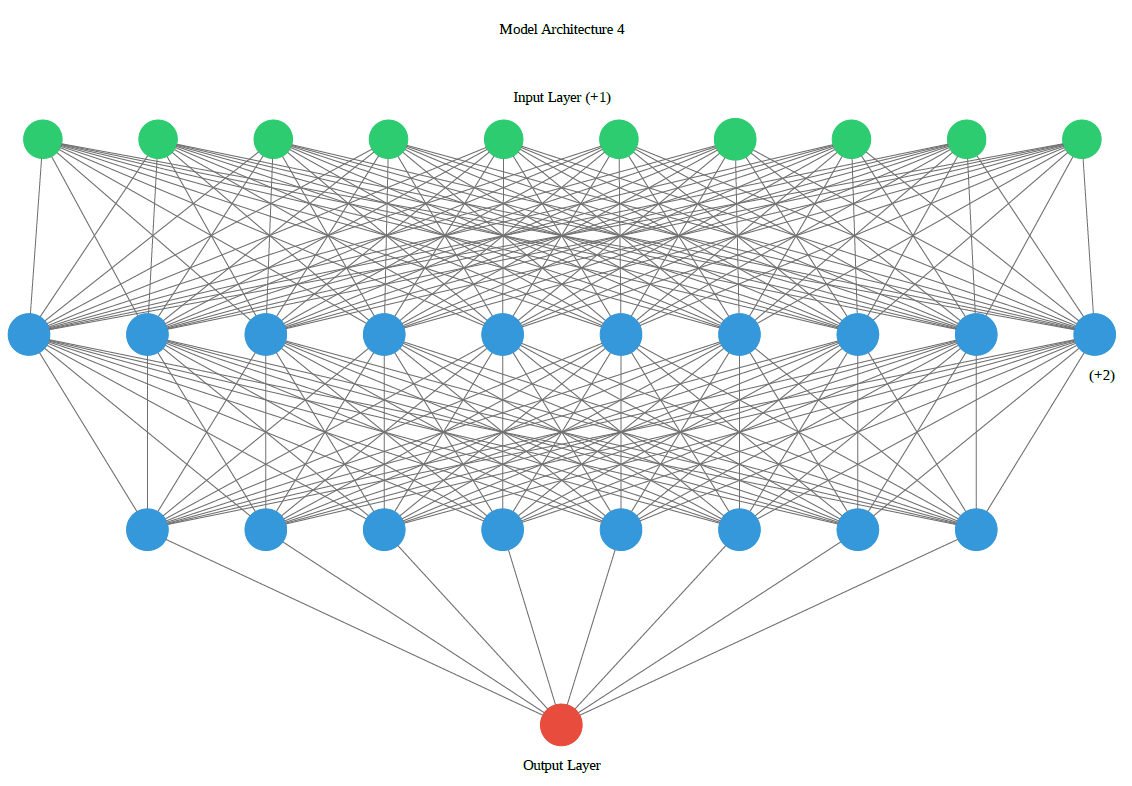

In [ ]:
model4.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
history = model4.fit(X_train, y_train,epochs=100, batch_size=32, verbose=1, validation_data=(X_val, y_val))

Epoch 1/100
100/100 [==============================] - 2s 7ms/step - loss: 0.6614 - accuracy: 0.6182 - val_loss: 0.5476 - val_accuracy: 0.7560
Epoch 2/100
100/100 [==============================] - 1s 6ms/step - loss: 0.4896 - accuracy: 0.7659 - val_loss: 0.4380 - val_accuracy: 0.8542
Epoch 3/100
100/100 [==============================] - 0s 5ms/step - loss: 0.3757 - accuracy: 0.9170 - val_loss: 0.3372 - val_accuracy: 0.9319
Epoch 4/100
100/100 [==============================] - 0s 5ms/step - loss: 0.3037 - accuracy: 0.9368 - val_loss: 0.2907 - val_accuracy: 0.9355
Epoch 5/100
100/100 [==============================] - 1s 5ms/step - loss: 0.2653 - accuracy: 0.9387 - val_loss: 0.2627 - val_accuracy: 0.9333
Epoch 6/100
100/100 [==============================] - 0s 5ms/step - loss: 0.2416 - accuracy: 0.9390 - val_loss: 0.2454 - val_accuracy: 0.9326
Epoch 7/100
100/100 [==============================] - 0s 3ms/step - loss: 0.2261 - accuracy: 0.9403 - val_loss: 0.2328 - val_accuracy: 0.9348

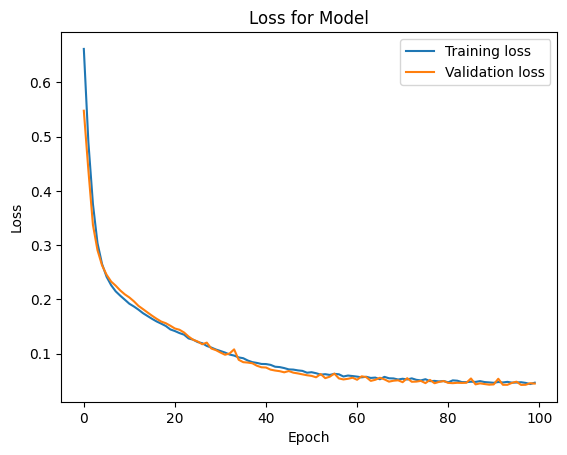

In [ ]:
# Plot the MAE for model
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.title('Loss for Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

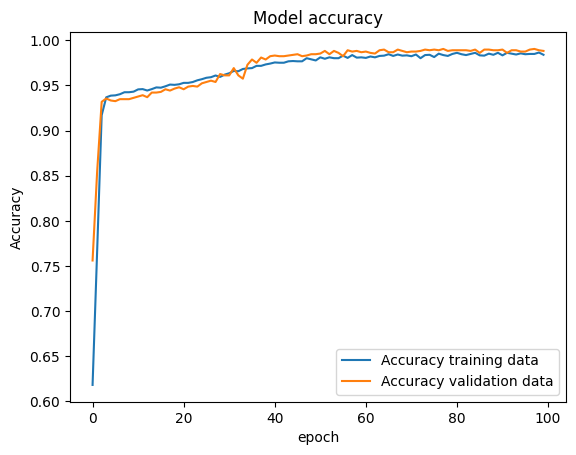

In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy training data')
plt.plot(history.history['val_accuracy'], label='Accuracy validation data')
plt.legend()
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
y_pred4 = nmp.round(model4.predict(X_test))

y_pred4[0:10]

loss4, acc4 = model4.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc4)


loss4, acc4 = model4.evaluate(X_train, y_train, verbose=0)
print('Train Accuracy: %.3f' % acc4)

print(pnd.DataFrame(metrics.confusion_matrix(y_test, y_pred4, labels=[0 ,1]), index=['true:White', 'true:Red'], columns=['pred:White', 'pred:Red']))

61/61 [==============================] - 0s 1ms/step
Test Accuracy: 0.982
Train Accuracy: 0.986
            pred:White  pred:Red
true:White        1440         8
true:Red            28       474


## 5th Architecture

- 3 Hidden layers
- Medium-sized node (8)

In [ ]:
# Define the model architecture
model5 = Sequential()

# Add an input layer
model5.add(Dense(12, activation='sigmoid', input_shape=(11,)))

# Add the first hidden layer
model5.add(Dense(8, activation='sigmoid'))

# Add the second hidden layer
model5.add(Dense(8, activation='sigmoid'))

# Add the third hidden layer
model5.add(Dense(8, activation='sigmoid'))

# Add an output layer
model5.add(Dense(1, activation='sigmoid'))

# Visualize the model architecture
ann_viz(model5, title="Model Architecture 5")

# Generate the model architecture visualization
ann_viz(model5, title="Model Architecture 5", filename="model_architecture_5.png")

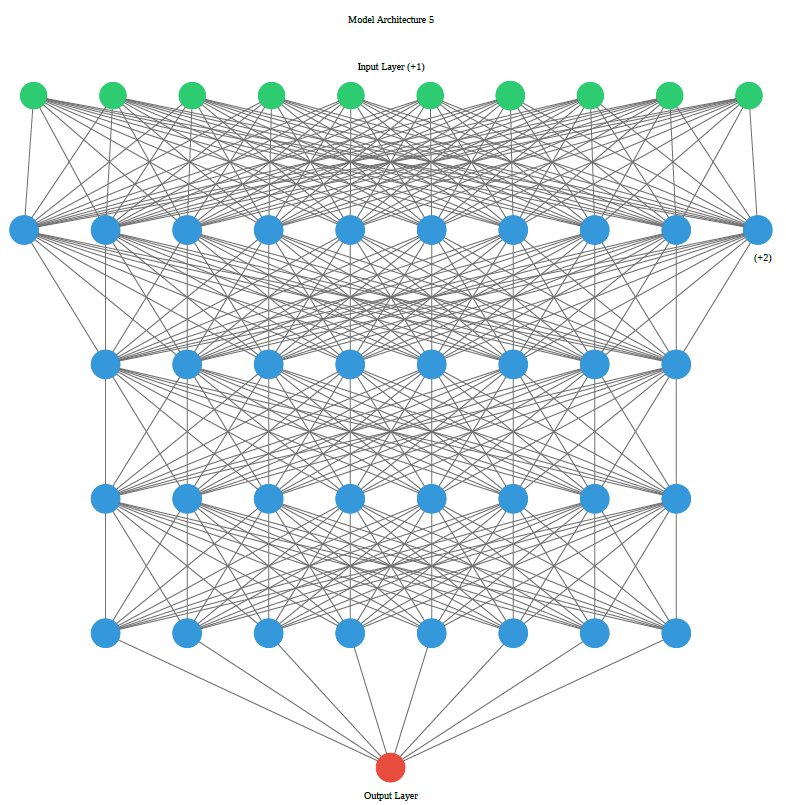

In [ ]:
model5.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
history = model5.fit(X_train, y_train,epochs=100, batch_size=32, verbose=1, validation_data=(X_val, y_val))

Epoch 1/100
100/100 [==============================] - 3s 9ms/step - loss: 0.5574 - accuracy: 0.7608 - val_loss: 0.5576 - val_accuracy: 0.7538
Epoch 2/100
100/100 [==============================] - 1s 5ms/step - loss: 0.5474 - accuracy: 0.7608 - val_loss: 0.5508 - val_accuracy: 0.7538
Epoch 3/100
100/100 [==============================] - 0s 5ms/step - loss: 0.5317 - accuracy: 0.7608 - val_loss: 0.5216 - val_accuracy: 0.7538
Epoch 4/100
100/100 [==============================] - 1s 5ms/step - loss: 0.4787 - accuracy: 0.7608 - val_loss: 0.4440 - val_accuracy: 0.7538
Epoch 5/100
100/100 [==============================] - 0s 5ms/step - loss: 0.3899 - accuracy: 0.7608 - val_loss: 0.3546 - val_accuracy: 0.7538
Epoch 6/100
100/100 [==============================] - 0s 4ms/step - loss: 0.3101 - accuracy: 0.8982 - val_loss: 0.2909 - val_accuracy: 0.9414
Epoch 7/100
100/100 [==============================] - 1s 5ms/step - loss: 0.2581 - accuracy: 0.9475 - val_loss: 0.2528 - val_accuracy: 0.9436

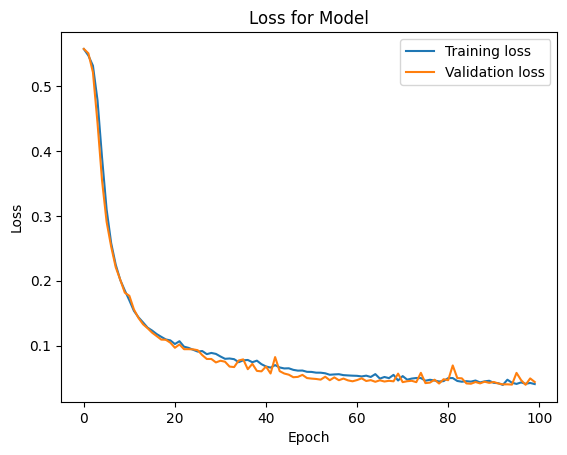

In [ ]:
# Plot the MAE for model
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.title('Loss for Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

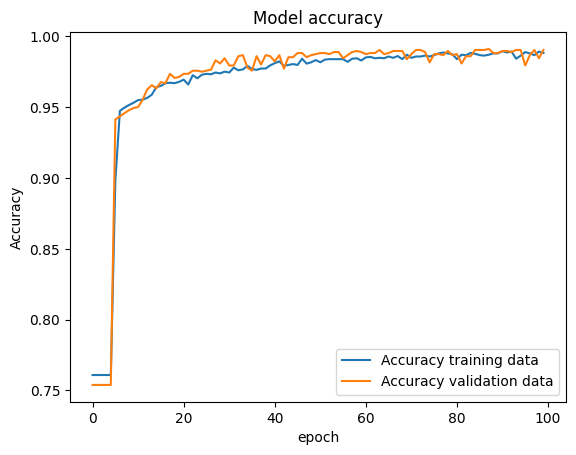

In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy training data')
plt.plot(history.history['val_accuracy'], label='Accuracy validation data')
plt.legend()
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
y_pred5 = nmp.round(model5.predict(X_test))

y_pred5[0:10]

loss5, acc5 = model5.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc5)

loss5, acc5 = model5.evaluate(X_train, y_train, verbose=0)
print('Train Accuracy: %.3f' % acc5)

print(pnd.DataFrame(metrics.confusion_matrix(y_test, y_pred5, labels=[0 ,1]), index=['true:White', 'true:Red'], columns=['pred:White', 'pred:Red']))

61/61 [==============================] - 0s 2ms/step
Test Accuracy: 0.977
Train Accuracy: 0.988
            pred:White  pred:Red
true:White        1423        25
true:Red            19       483


In [ ]:
# model 1

loss1, acc1 = model1.evaluate(X_test, y_test, verbose=0)
print('1st Architecture Test Accuracy: %.3f' % acc1)


loss1, acc1 = model1.evaluate(X_train, y_train, verbose=0)
print('1st Architecture Train Accuracy: %.3f' % acc1)

# model 2

loss2, acc2 = model2.evaluate(X_test, y_test, verbose=0)
print('2nd Architecture Test Accuracy: %.3f' % acc2)


loss2, acc2 = model2.evaluate(X_train, y_train, verbose=0)
print('2nd Architecture Train Accuracy: %.3f' % acc2)

# model 3

loss3, acc3 = model3.evaluate(X_test, y_test, verbose=0)
print('3rd Architecture Test Accuracy: %.3f' % acc3)


loss3, acc3 = model3.evaluate(X_train, y_train, verbose=0)
print('3rd Architecture Train Accuracy: %.3f' % acc3)

# model 4

loss4, acc4 = model4.evaluate(X_test, y_test, verbose=0)
print('4th Architecture Test Accuracy: %.3f' % acc4)

loss4, acc4 = model4.evaluate(X_train, y_train, verbose=0)
print('4th Architecture Train Accuracy: %.3f' % acc4)

# model 5

loss5, acc5 = model5.evaluate(X_test, y_test, verbose=0)
print('5th Architecture Test Accuracy: %.3f' % acc5)


loss5, acc5 = model5.evaluate(X_train, y_train, verbose=0)
print('5th Architecture Train Accuracy: %.3f' % acc5)

1st Architecture Test Accuracy: 0.979
1st Architecture Train Accuracy: 0.985
2nd Architecture Test Accuracy: 0.979
2nd Architecture Train Accuracy: 0.987
3rd Architecture Test Accuracy: 0.978
3rd Architecture Train Accuracy: 0.987
4th Architecture Test Accuracy: 0.982
4th Architecture Train Accuracy: 0.986
5th Architecture Test Accuracy: 0.977
5th Architecture Train Accuracy: 0.988


As we can see from the list above, the 2nd architecture takes the cake on this one and will proceed to the next step.

# ***MODEL TUNING***

This code allows us to easily create neural network models with different hyperparameters by calling the create_model function and providing the desired values for optimizer, learning rate, and activation.

In [ ]:
# Define the model architecture
def create_model(optimizer='adam', learning_rate=0.001, activation='sigmoid'):
    model = Sequential()
    model.add(Dense(12, activation=activation, input_shape=(11,)))
    model.add(Dense(8, activation=activation))
    model.add(Dense(8, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

This code performs hyperparameter tuning using GridSearchCV in combination with a KerasClassifier. The goal is to find the best combination of hyperparameters for the neural network model.

In [ ]:
# Create the KerasClassifier
model2 = KerasClassifier(build_fn=create_model)

# Define the hyperparameter search space
param_grid = {
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'learning_rate': [0.001, 0.01, 0.1],
    'activation': ['sigmoid', 'relu', 'tanh']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(model2, param_grid, cv=3)

# Train and evaluate models for each hyperparameter combination
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test dataset
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Test Accuracy: %.3f' % acc)


<ipython-input-142-a302bc6c0266>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model2 = KerasClassifier(build_fn=create_model)


61/61 [==============================] - 0s 1ms/step
Test Accuracy: 0.928


In [ ]:
# Collect all hyperparameters and their values
hyperparameters = {}
for param in param_grid:
    hyperparameters[param] = grid_search.cv_results_['param_' + param].tolist()

# Retrieve the mean cross-validated scores
mean_scores = grid_search.cv_results_['mean_test_score'].tolist()

# Add accuracy to the hyperparameters dictionary
hyperparameters['accuracy'] = mean_scores

# Get the index of the best score
best_index = grid_search.best_index_

# Add the accuracy of the best hyperparameter to the table
hyperparameters['accuracy'][best_index] = grid_search.best_score_

# Create a table from the hyperparameters dictionary
table = tabulate(hyperparameters, headers='keys', tablefmt='presto')

# Print the table
print('Hyperparameters and Accuracy:')
print(table)

# Print the best hyperparameters and its accuracy
print('\nBest Hyperparameters:')
for param, value in best_params.items():
    print(f"{param}: {value}")
print(f"Accuracy: {grid_search.best_score_}")

Hyperparameters and Accuracy:
 optimizer   |   learning_rate | activation   |   accuracy
-------------+-----------------+--------------+------------
 adam        |           0.001 | sigmoid      |   0.760844
 sgd         |           0.001 | sigmoid      |   0.760844
 rmsprop     |           0.001 | sigmoid      |   0.760844
 adam        |           0.01  | sigmoid      |   0.595277
 sgd         |           0.01  | sigmoid      |   0.760844
 rmsprop     |           0.01  | sigmoid      |   0.769963
 adam        |           0.1   | sigmoid      |   0.760844
 sgd         |           0.1   | sigmoid      |   0.760844
 rmsprop     |           0.1   | sigmoid      |   0.58271
 adam        |           0.001 | relu         |   0.660819
 sgd         |           0.001 | relu         |   0.82054
 rmsprop     |           0.001 | relu         |   0.828076
 adam        |           0.01  | relu         |   0.698684
 sgd         |           0.01  | relu         |   0.794774
 rmsprop     |           0.

In [ ]:
# Evaluate the best model on the validation dataset
y_val_pred = best_model.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)

# Evaluate the best model on the testing dataset
y_test_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print the validation and testing results
print("Validation Results:")
print("Accuracy: {:.3f}".format(val_acc))
print("Precision: {:.3f}".format(val_precision))
print("Recall: {:.3f}".format(val_recall))
print("F1-score: {:.3f}".format(val_f1))
print()
print("Testing Results:")
print("Accuracy: {:.3f}".format(test_acc))
print("Precision: {:.3f}".format(test_precision))
print("Recall: {:.3f}".format(test_recall))
print("F1-score: {:.3f}".format(test_f1))

61/61 [==============================] - 0s 1ms/step
Validation Results:
Accuracy: 0.933
Precision: 0.942
Recall: 0.777
F1-score: 0.852

Testing Results:
Accuracy: 0.928
Precision: 0.946
Recall: 0.763
F1-score: 0.845


The validation and testing results show the performance of the model on unseen data. Here's a brief explanation of the scores:

* Accuracy quantifies how accurately forecasts were made overall. The model's accuracy in testing and validation is very high, at about 93%. This shows that the model can accurately classify the majority of instances, according to the data.

* Precision is the percentage of positive instances out of all positive instances properly predicted. The precision is high, at about 94%, in both validation and testing. This implies that the model is quite likely to be accurate when it predicts a positive occurrence.

* Recall, often referred to as sensitivity or the true positive rate, gauges the percentage of instances that are actually positive and are accurately anticipated to be such. The recall is roughly 78% in the validation set and 76% in the testing set. This shows that while a sizable number of the positive events are captured by the model, there is still some opportunity for improvement.

* The harmonic mean of precision and recall, which offers a balanced assessment of both metrics, is the F1-score. The F1-score is approximately 85% in both validation and testing. This shows that the model successfully strikes a balance between recall and precision.

Overall, the model demonstrates good performance with high accuracy, precision, and F1-score. The recall score is also reasonably high but could be further improved. 